In [10]:
import numpy as np
from loaders import load_results
from utils import power_interval

from matplotlib import pyplot as plt

### CG results

In [11]:
cg_uniform_results, cg_config = load_results("output_CG_3/", data='cg', method='uniform') # time, power, num of features + config
cg_rlss_results, _ = load_results("output_CG_3/", data='cg', method='rlss')
cg_rff_results, _ = load_results("output_CG_3/", data='cg', method='rff')

print(cg_uniform_results.shape)

#rho2 = cg_config['rho2']
rho2 = [0.51, 0.54, 0.57, 0.6, 0.63, 0.66]
#K = cg_config['K']

n_feat = 4 # index for num of features in the list K (4 is sqrt(n))

uniform_powers = np.asarray([power_interval(el, 400) for el in cg_uniform_results[:,1, n_feat]])
rlss_powers = np.asarray([power_interval(el, 400) for el in cg_rlss_results[:,1, n_feat]])
rff_powers = np.asarray([power_interval(el, 400) for el in cg_rff_results[:,1, n_feat]])

loading uniform
['output_CG_3/ntot5000_B200_niter400_rho0.51/uniform/results.npy', 'output_CG_3/ntot5000_B200_niter400_rho0.60/uniform/results.npy', 'output_CG_3/ntot5000_B200_niter400_rho0.63/uniform/results.npy', 'output_CG_3/ntot5000_B200_niter400_rho0.54/uniform/results.npy', 'output_CG_3/ntot5000_B200_niter400_rho0.57/uniform/results.npy', 'output_CG_3/ntot5000_B200_niter400_rho0.66/uniform/results.npy']
loading rlss
['output_CG_3/ntot5000_B200_niter400_rho0.51/rlss/results.npy', 'output_CG_3/ntot5000_B200_niter400_rho0.60/rlss/results.npy', 'output_CG_3/ntot5000_B200_niter400_rho0.63/rlss/results.npy', 'output_CG_3/ntot5000_B200_niter400_rho0.54/rlss/results.npy', 'output_CG_3/ntot5000_B200_niter400_rho0.57/rlss/results.npy', 'output_CG_3/ntot5000_B200_niter400_rho0.66/rlss/results.npy']
loading rff
['output_CG_3/ntot5000_B200_niter400_rho0.51/rff/results.npy', 'output_CG_3/ntot5000_B200_niter400_rho0.60/rff/results.npy', 'output_CG_3/ntot5000_B200_niter400_rho0.63/rff/results.np

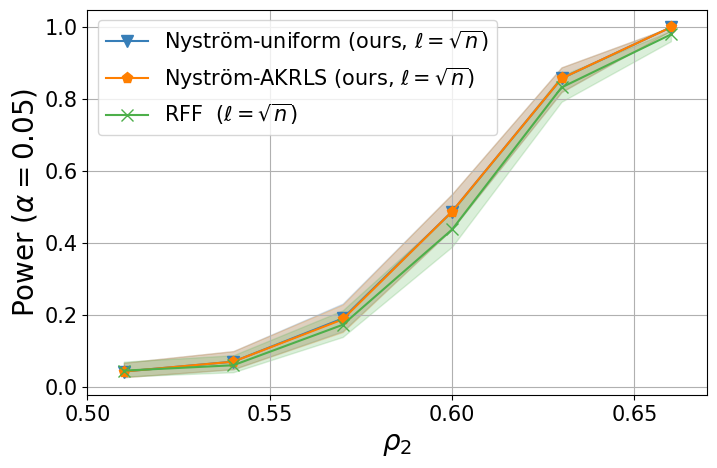

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(rho2, uniform_powers[:,0], '-v', markersize=8, label=r'Nyström-uniform (ours, $\ell=\sqrt{n}$)', c='#377eb8')
plt.fill_between(rho2, 
                 uniform_powers[:,1], 
                 uniform_powers[:,2], 
                 alpha=0.2, color='#377eb8')
plt.plot(rho2, rlss_powers[:,0], '-p', markersize=8, label=r'Nyström-AKRLS (ours, $\ell=\sqrt{n}$)', c='#ff7f00')
plt.fill_between(rho2, 
                 rlss_powers[:,1], 
                 rlss_powers[:,2], 
                 alpha=0.2, color='#ff7f00')
plt.plot(rho2, rff_powers[:,0], '-x', markersize=8, label=r'RFF  ($\ell=\sqrt{n}$)', c='#4daf4a')
plt.fill_between(rho2, 
                 rff_powers[:,1], 
                 rff_powers[:,2], 
                 alpha=0.2, color='#4daf4a')
# plt.plot(fullrank_time_pow_nft[:,-1], fullrank_power[:,0], '-o', markersize=8, label=r'Full rank', c='#984ea3')
# plt.fill_between(fullrank_time_pow_nft[:,-1], 
#                  fullrank_power[:,1], 
#                  fullrank_power[:,2], 
#                  alpha=0.5, color='#984ea3')
plt.ylabel(r'Power ($\alpha=0.05$)', fontsize=20)
plt.xlabel(r'$\rho_2$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.locator_params(nbins=6, axis='x')
#plt.xscale('log')
plt.legend(loc=2, fontsize=15)
#plt.title("Correlated Gaussians", fontsize=20)
plt.xlim(0.5,0.67)
plt.grid()
plt.show()

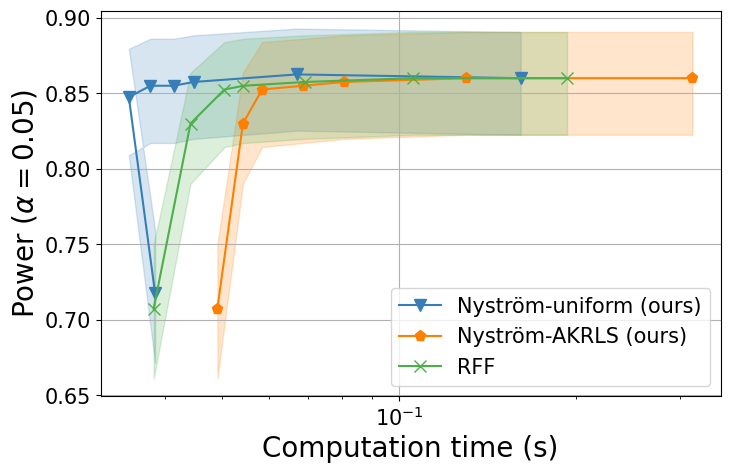

In [13]:
which_rho = 4 # which value of rho2 to look at comp time


uniform_powers_time = np.asarray([power_interval(el, 400) for el in cg_uniform_results[which_rho,1,:]])
rlss_powers_time = np.asarray([power_interval(el, 400) for el in cg_rlss_results[which_rho,1,:]])
rff_powers_time = np.asarray([power_interval(el, 400) for el in cg_rlss_results[which_rho,1,:]])

plt.figure(figsize=(8, 5))
plt.plot(cg_uniform_results[which_rho,0,:], uniform_powers_time[:,0], '-v', markersize=8, label='Nyström-uniform (ours)', c='#377eb8')
plt.fill_between(cg_uniform_results[which_rho,0,:], 
                uniform_powers_time[:,1], 
                 uniform_powers_time[:,2], 
                 alpha=0.2, color='#377eb8')
plt.plot(cg_rlss_results[which_rho,0,:], rlss_powers_time[:,0], '-p', markersize=8, label='Nyström-AKRLS (ours)', c='#ff7f00')
plt.fill_between(cg_rlss_results[which_rho,0,:], 
                 rlss_powers_time[:,1], 
                 rlss_powers_time[:,2], 
                 alpha=0.2, color='#ff7f00')
plt.plot(cg_rff_results[which_rho,0,:], rff_powers_time[:,0], '-x', markersize=8, label='RFF', c='#4daf4a')
plt.fill_between(cg_rff_results[which_rho,0,:], 
                 rff_powers_time[:,1], 
                 rff_powers_time[:,2], 
                 alpha=0.2, color='#4daf4a')
plt.ylabel(r'Power ($\alpha=0.05$)', fontsize=20)
plt.xlabel('Computation time (s)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.locator_params(nbins=6, axis='y')
plt.legend(loc=4, fontsize=15)
plt.grid()
#plt.title("Correlated Gaussians", fontsize=20)
#plt.ylim(0.63,0.92)
plt.xscale('log')
plt.show()

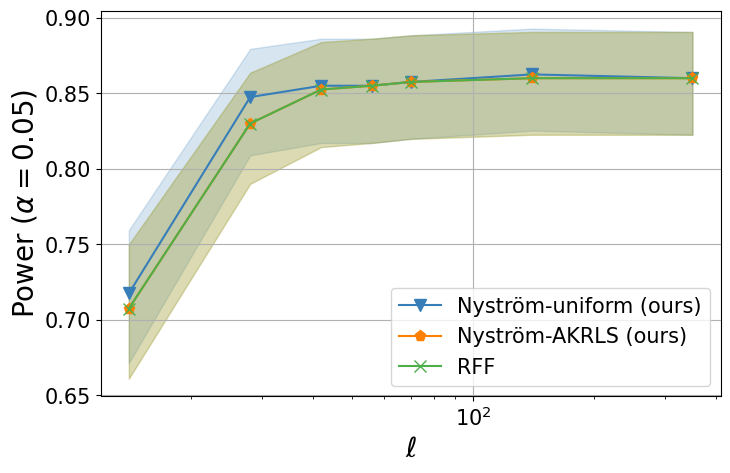

In [14]:
which_rho = 4 # which value of rho2 to look


uniform_powers_time = np.asarray([power_interval(el, 400) for el in cg_uniform_results[which_rho,1,:]])
rlss_powers_time = np.asarray([power_interval(el, 400) for el in cg_rlss_results[which_rho,1,:]])
rff_powers_time = np.asarray([power_interval(el, 400) for el in cg_rlss_results[which_rho,1,:]])

plt.figure(figsize=(8, 5))
plt.plot(cg_uniform_results[which_rho,2,:], uniform_powers_time[:,0], '-v', markersize=8, label='Nyström-uniform (ours)', c='#377eb8')
plt.fill_between(cg_uniform_results[which_rho,2,:], 
                uniform_powers_time[:,1], 
                 uniform_powers_time[:,2], 
                 alpha=0.2, color='#377eb8')
plt.plot(cg_rlss_results[which_rho,2,:], rlss_powers_time[:,0], '-p', markersize=8, label='Nyström-AKRLS (ours)', c='#ff7f00')
plt.fill_between(cg_rlss_results[which_rho,2,:], 
                 rlss_powers_time[:,1], 
                 rlss_powers_time[:,2], 
                 alpha=0.2, color='#ff7f00')
plt.plot(cg_rff_results[which_rho,2,:], rff_powers_time[:,0], '-x', markersize=8, label='RFF', c='#4daf4a')
plt.fill_between(cg_rff_results[which_rho,2,:], 
                 rff_powers_time[:,1], 
                 rff_powers_time[:,2], 
                 alpha=0.2, color='#4daf4a')
plt.ylabel(r'Power ($\alpha=0.05$)', fontsize=20)
plt.xlabel(r'$\ell$', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.locator_params(nbins=6, axis='y')
plt.legend(loc=4, fontsize=15)
plt.grid()
#plt.title("Correlated Gaussians", fontsize=20)
#plt.ylim(0.63,0.92)
plt.xscale('log')
plt.show()